In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_log_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
import numpy as np

In [67]:
price_df = pd.read_csv('/content/laptop_price.csv', encoding='latin1')

In [59]:
price_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
price_df.shape

(1303, 13)

In [12]:
# tipo de datos de cada una de las columnas
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [68]:
price_df['Weight'] = price_df['Weight'].str.replace('kg', '').astype(float)
price_df['Ram'] = price_df['Ram'].str.replace('GB', '').astype(float)
# tipo de datos de cada una de las columnas
price_df_numeric = price_df.select_dtypes(include=['float64', 'int64'])
price_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Inches       1303 non-null   float64
 2   Ram          1303 non-null   float64
 3   Weight       1303 non-null   float64
 4   Price_euros  1303 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 51.0 KB


In [55]:
price_df.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [56]:
# Verificar si existen valores nulos
null_count = price_df.isnull().sum()
null_count

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


Estadísticos de Company:
count     1303
unique      19
top       Dell
freq       297
Name: Company, dtype: object


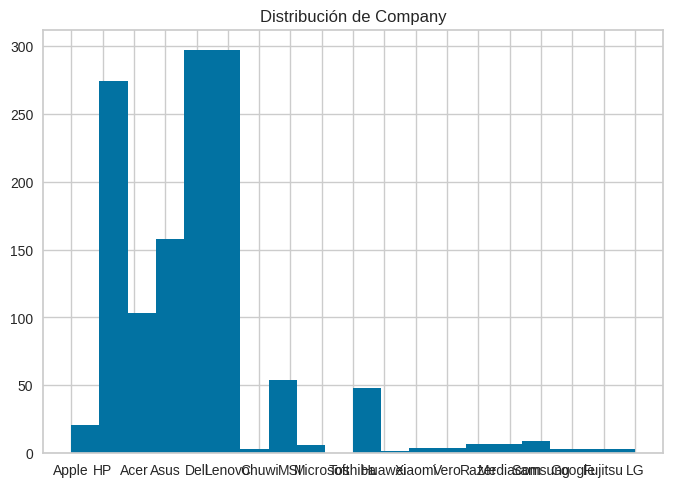

In [16]:
# Analizar estadísticos de las variables Company, Price_euros, Ram
var1 = 'Company'
print("Estadísticos de "+var1+":")
print(price_df[var1].describe().round(2))

# Crear histogramas de las variables Company, Price_euros, Ram
plt.hist(price_df[var1], bins=20)
plt.title("Distribución de "+var1)
plt.show()

Estadísticos de Price_euros:
count    1303.00
mean     1123.69
std       699.01
min       174.00
25%       599.00
50%       977.00
75%      1487.88
max      6099.00
Name: Price_euros, dtype: float64


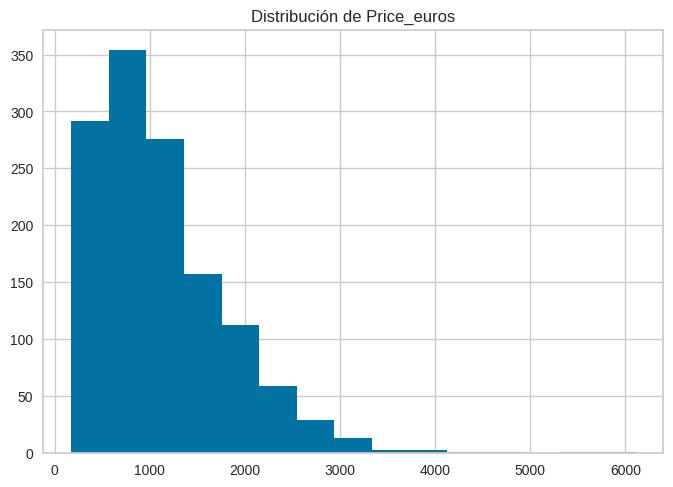

In [17]:
# Analizar estadísticos de las variables Company, Price_euros, Ram, Weight
var1 = 'Price_euros'
print("Estadísticos de "+var1+":")
print(price_df[var1].describe().round(2))

# Crear histogramas de las variables Company, Price_euros, Ram, Weight
plt.hist(price_df[var1], bins=15)
plt.title("Distribución de "+var1)
plt.show()

Estadísticos de Ram:
count    1303.00
mean        8.38
std         5.08
min         2.00
25%         4.00
50%         8.00
75%         8.00
max        64.00
Name: Ram, dtype: float64


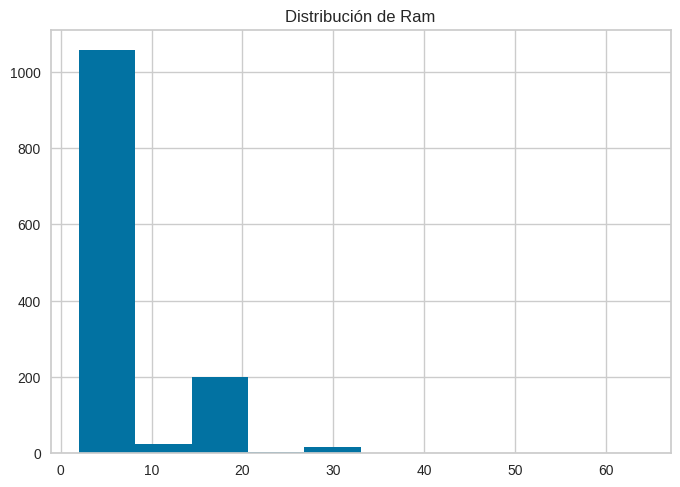

In [18]:
# Analizar estadísticos de las variables Company, Price_euros, Ram, Weight
var1 = 'Ram'

print("Estadísticos de "+var1+":")
print(price_df[var1].describe().round(2))

# Crear histogramas de las variables Company, Price_euros, Ram, Weight
plt.hist(price_df[var1], bins=10)
plt.title("Distribución de "+var1)
plt.show()

Estadísticos de Weight:
count    1303.00
mean        2.04
std         0.67
min         0.69
25%         1.50
50%         2.04
75%         2.30
max         4.70
Name: Weight, dtype: float64


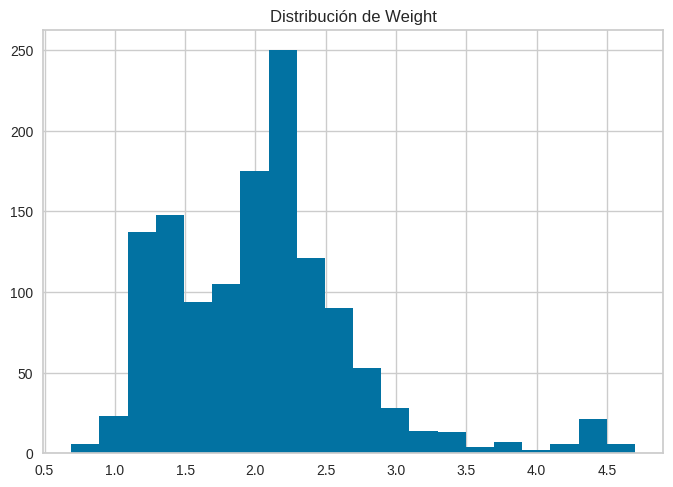

In [19]:
# Analizar estadísticos de las variables Company, Price_euros, Ram, Weight
var1 = 'Weight'

print("Estadísticos de "+var1+":")
print(price_df[var1].describe().round(2))

# Crear histogramas de las variables Company, Price_euros, Ram, Weight
plt.hist(price_df[var1], bins=20)
plt.title("Distribución de "+var1)
plt.show()


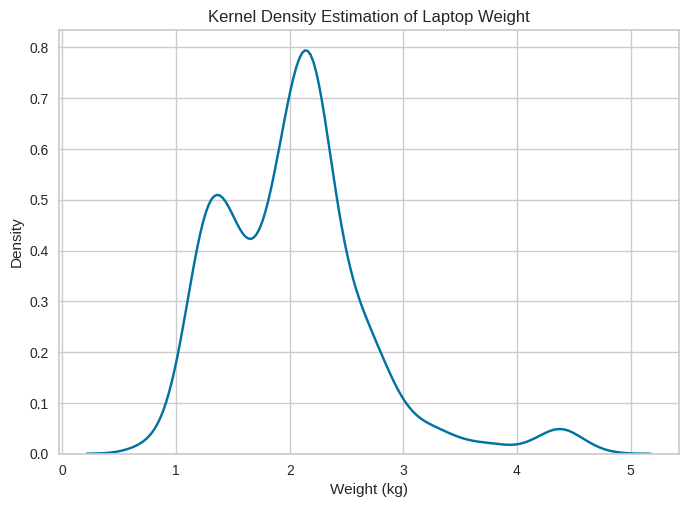

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(price_df['Weight'])
plt.title('Kernel Density Estimation of Laptop Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')
plt.show()

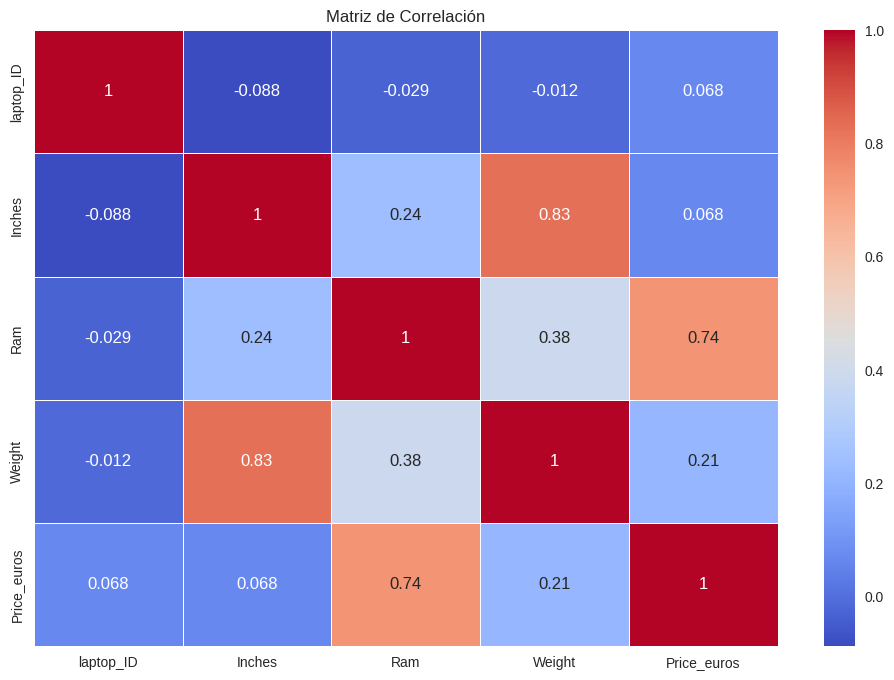

In [21]:
# Calcular la matriz de correlación
correlation_matrix = price_df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [22]:
# Calcular la matriz de correlación
correlation_matrix = price_df_numeric.corr()

# Convertir la matriz a un formato largo (pares de variables y correlaciones)
correlation_pairs = correlation_matrix.unstack()

# Ordenar por valor de correlación (en orden descendente)
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)

# Mostrar las correlaciones más altas (exceptuando 1, que es la correlación de cada variable consigo misma)
print(sorted_pairs[sorted_pairs != 1].head(20))  # 10 pares más correlacionados

Inches       Weight         0.827631
Weight       Inches         0.827631
Price_euros  Ram            0.743007
Ram          Price_euros    0.743007
             Weight         0.383874
Weight       Ram            0.383874
Ram          Inches         0.237993
Inches       Ram            0.237993
Weight       Price_euros    0.210370
Price_euros  Weight         0.210370
Inches       Price_euros    0.068197
Price_euros  Inches         0.068197
             laptop_ID      0.067830
laptop_ID    Price_euros    0.067830
Weight       laptop_ID     -0.011798
laptop_ID    Weight        -0.011798
Ram          laptop_ID     -0.028607
laptop_ID    Ram           -0.028607
             Inches        -0.087796
Inches       laptop_ID     -0.087796
dtype: float64


In [23]:
#Company, Price_euros, Ram, Weight
price_df['Company']

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1298,Lenovo
1299,Lenovo
1300,Lenovo
1301,HP


In [69]:
df = price_df.filter(['Ram','Weight','Company','Price_euros'], axis=1)
df.head()

,Ram,Weight,Company,Price_euros
0,8.0,1.37,Apple,1339.69
1,8.0,1.34,Apple,898.94
2,8.0,1.86,HP,575.00
3,16.0,1.83,Apple,2537.45
4,8.0,1.37,Apple,1803.60


In [25]:
# train_test_split es una función de scikit-learn que divide un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para prueba (testing).
# random_state indica que se obtendrá la misma división de los datos. Esto es útil para garantizar que los resultados sean consistentes en diferentes ejecuciones del código.
# X_train: Subconjunto de las variables independientes utilizado para entrenar el modelo.
# X_test: Subconjunto de las variables independientes utilizado para probar el modelo.
# y_train: Subconjunto de las variables dependientes correspondientes a X_train para entrenar el modelo.
# y_test: Subconjunto de las variables dependientes correspondientes a X_test para probar el modelo.


# Separamos los datos en conjunto de entrenamiento y conjunto de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(df['Ram'],df['Price_euros'],test_size=30,random_state=0)

X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

# Creamos un objeto de Regresion lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)

# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
ram_y_pred = regr.predict(X_test)

In [81]:
ram_y_pred

array([ 676.46237411, 1898.1152521 , 1898.1152521 ,  676.46237411,
       1898.1152521 ,  676.46237411,  676.46237411,  676.46237411,
       1083.6800001 , 1898.1152521 , 1083.6800001 ,  676.46237411,
        472.85356111, 1083.6800001 , 2712.5505041 , 1083.6800001 ,
        676.46237411, 1898.1152521 , 1898.1152521 , 1898.1152521 ,
        676.46237411, 1898.1152521 ,  676.46237411, 1083.6800001 ,
       1083.6800001 ,  676.46237411,  676.46237411,  676.46237411,
       1083.6800001 , 1083.6800001 ])

In [26]:
#Se utiliza y test para la evaluación
y_test

,Price_euros
580,389.00
1017,2968.00
761,1859.00
686,612.61
186,2397.00
481,586.60
5,400.00
317,459.90
402,1144.50
247,2999.00


In [27]:
r2 = r2_score(y_test, ram_y_pred)
mse = root_mean_squared_error(y_test, ram_y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, ram_y_pred))
mae = mean_absolute_error(y_test, ram_y_pred)
rmsle = np.sqrt(root_mean_squared_log_error(y_test, ram_y_pred))

print(f"R2: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")

R2: 0.61
Mean Squared Error (MSE): 509.83
Mean Absolute Error (MAE): 352.45
Root Mean Squared Error (RMSE): 22.58
Root Mean Squared Logarithmic Error (RMSLE): 0.64


In [28]:
#Utilización de Cross Validation
from sklearn.model_selection import train_test_split, cross_val_predict
# Definimos X e y
X = df[['Ram']]
y = df['Price_euros']

# Creamos un objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Aplicamos cross-validation
ram_y_pred = cross_val_predict(regr, X, y, cv=5)

# Calculamos las métricas
r2 = r2_score(y, ram_y_pred)
mse = root_mean_squared_error(y, ram_y_pred)
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, ram_y_pred)
rmsle = np.sqrt(root_mean_squared_log_error(y, ram_y_pred))

# Mostramos los resultados
print(f"R2: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")

R2: 0.54
Mean Squared Error (MSE): 475.04
Mean Absolute Error (MAE): 352.69
Root Mean Squared Error (RMSE): 21.80
Root Mean Squared Logarithmic Error (RMSLE): 0.66


In [29]:
# Añadimos una constante para el término de intercepción
X_train_const = sm.add_constant(X_train)

# Ajustamos el modelo de regresión lineal usando statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Imprimimos el resumen del modelo, que incluye los p-valores
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1553.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.33e-222
Time:                        03:06:32   Log-Likelihood:                -9629.6
No. Observations:                1273   AIC:                         1.926e+04
Df Residuals:                    1271   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        269.2447     25.276     10.652      0.0

'Omnibus y Prob(Omnibus): Idealmente, valores p altos (ej. > 0.05) indican que los residuos son normales.\nDurbin-Watson: Valores cercanos a 2 indican que no hay autocorrelación.\nJarque-Bera y Prob(JB): Un valor p alto (> 0.05) sugiere que los residuos son normales.\nSkew (Asimetría): Valores cercanos a 0 indican una distribución simétrica.\nKurtosis: Valores cercanos a 3 indican una distribución normal en cuanto a "apuntalidad"'

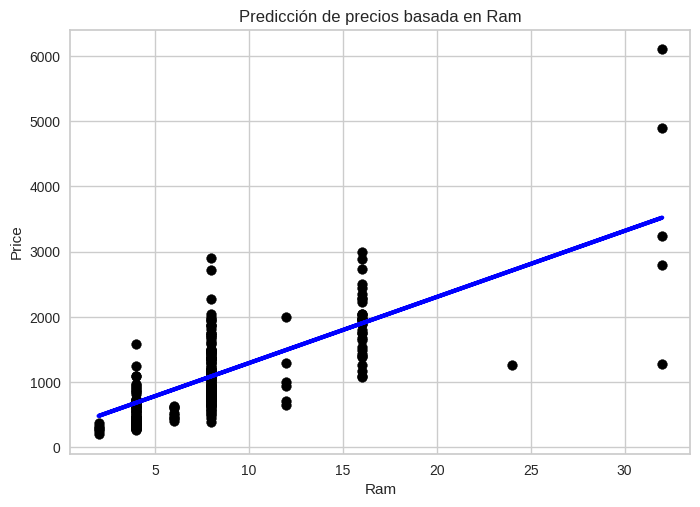

Mean Squared Error (MSE): 227663.91
Mean Absolute Error (MAE): 345.83
Root Mean Squared Error (RMSE): 477.14
R² (Coefficient of Determination): 0.55


In [81]:


X = df[['Ram']]
y = df['Price_euros']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

ram_y_pred = regr.predict(X_test)

plt.scatter(X_test['Ram'], y_test, color='black')
plt.plot(X_test['Ram'], ram_y_pred, color='blue', linewidth=3)

plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Predicción de precios basada en Ram')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular las métricas
mse = mean_squared_error(y_test, ram_y_pred)
mae = mean_absolute_error(y_test, ram_y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del error cuadrático medio
r2 = r2_score(y_test, ram_y_pred)

# Mostrar las métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² (Coefficient of Determination): {r2:.2f}')

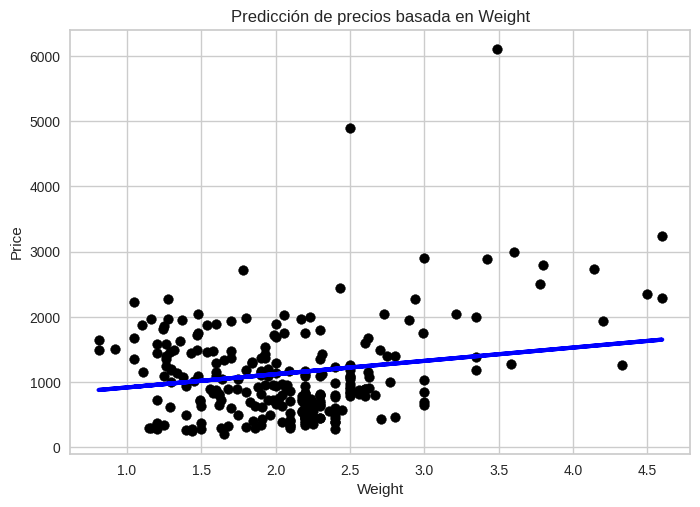

In [31]:
X = df[['Weight']]
y = df['Price_euros']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


ram_y_pred = regr.predict(X_test)


plt.scatter(X_test['Weight'], y_test, color='black')
plt.plot(X_test['Weight'], ram_y_pred, color='blue', linewidth=3)

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Predicción de precios basada en Weight')
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X = df[['Ram','Weight']]  # Características
y = df['Price_euros']  # Variable objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² (Coefficient of Determination): {r2:.2f}')

Mean Squared Error (MSE): 222882.58
Mean Absolute Error (MAE): 338.96
Root Mean Squared Error (RMSE): 472.10
R² (Coefficient of Determination): 0.56


In [71]:


label_encoder = LabelEncoder()
df['Company_encoded'] = label_encoder.fit_transform(df['Company'])
df.head()

,Ram,Weight,Company,Price_euros,Company_encoded
0,8.0,1.37,Apple,1339.69,1
1,8.0,1.34,Apple,898.94,1
2,8.0,1.86,HP,575.00,7
3,16.0,1.83,Apple,2537.45,1
4,8.0,1.37,Apple,1803.60,1


In [72]:
df = df.filter(['Ram','Weight','Company_encoded','Price_euros'], axis=1)
df.head()

,Ram,Weight,Company_encoded,Price_euros
0,8.0,1.37,1,1339.69
1,8.0,1.34,1,898.94
2,8.0,1.86,7,575.00
3,16.0,1.83,1,2537.45
4,8.0,1.37,1,1803.60


In [77]:
# Variables independientes
X = df[['Ram','Company_encoded']]  # Características
y = df['Price_euros']  # Variable objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² (Coefficient of Determination): {r2:.2f}')

Mean Squared Error (MSE): 219623.47
Mean Absolute Error (MAE): 338.49
Root Mean Squared Error (RMSE): 468.64
R² (Coefficient of Determination): 0.57


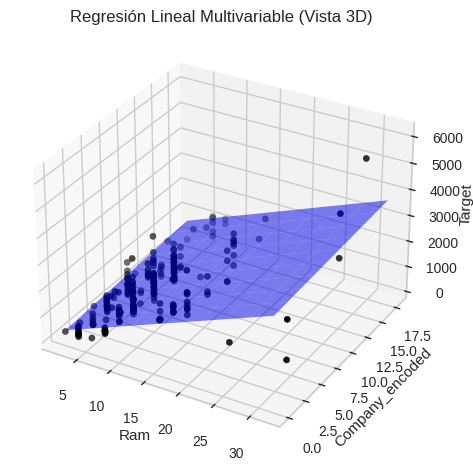

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos de prueba
ax.scatter(X_test['Ram'], X_test['Company_encoded'], y_test, color='black', label='Actual')

# Superficie de predicción
X1, X2 = np.meshgrid(np.linspace(X_test['Ram'].min(), X_test['Ram'].max(), 10),
                     np.linspace(X_test['Company_encoded'].min(), X_test['Company_encoded'].max(), 10))
Y = model.intercept_ + model.coef_[0] * X1 + model.coef_[1] * X2
ax.plot_surface(X1, X2, Y, color='blue', alpha=0.5)

ax.set_xlabel('Ram')
ax.set_ylabel('Company_encoded')
ax.set_zlabel('Target')
ax.set_title('Regresión Lineal Multivariable (Vista 3D)')
plt.show()